<a href="https://colab.research.google.com/github/meryemalp/Project-Bootcamp/blob/main/Global_AI_HUB_Bootcamp_Proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

In [2]:
movies = pd.read_csv('/content/NetflixOriginals.csv', encoding='latin-1')
#Read Data
movies.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [3]:
print(f"Number of rows in dataset: {movies.shape[0]}")
print(f"Number of columns in dataset: {movies.shape[1]}")

Number of rows in dataset: 584
Number of columns in dataset: 6


In [4]:
for count, i in enumerate(movies):
    print('Count of',f'{movies.columns[count]}')
    x = np.count_nonzero(movies[i].unique())
    print(x)

Count of Title
584
Count of Genre
115
Count of Premiere
390
Count of Runtime
124
Count of IMDB Score
54
Count of Language
38


English                       252
Hindi                          32
Spanish                        22
French                         13
Italian                        12
Portuguese                      9
Indonesian                      7
Korean                          5
German                          5
Japanese                        4
Turkish                         4
Marathi                         3
Dutch                           3
Polish                          3
Filipino                        2
Thai                            1
Malay                           1
English/Japanese                1
Spanish/Catalan                 1
English/Taiwanese/Mandarin      1
Khmer/English/French            1
Tamil                           1
Spanish/English                 1
English/Korean                  1
English/Arabic                  1
English/Akan                    1
English/Ukranian/Russian        1
Name: Language, dtype: int64


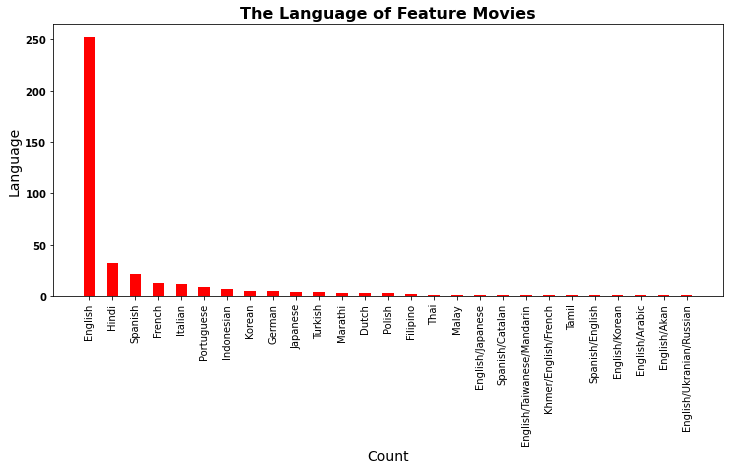

In [5]:
#Veri setine göre uzun soluklu filmlerin dilleri
long_run = movies[movies['Runtime']>90]
language=long_run.Language.value_counts().index
count=long_run.Language.value_counts()
print(count)
plt.figure(figsize=(12,5))
plt.title("The Language of Feature Movies", weight="bold", color="black", fontsize=16)
plt.bar(language,count,color ='red',width = 0.5)
plt.xticks(rotation=90)
plt.xlabel("Count", color="black", fontsize=14)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.ylabel("Language", color="black", fontsize=14)
plt.show()

                                                 Title        Genre  \
577                             Dancing with the Birds  Documentary   
572                  Disclosure: Trans Lives on Screen  Documentary   
563                                      A Secret Love  Documentary   
555                 Crip Camp: A Disability Revolution  Documentary   
554                   Brene Brown: The Call to Courage  Documentary   
546                                   Tell Me Who I Am  Documentary   
545  Rolling Thunder Revue: A bob Dylan Story by Ma...  Documentary   
542                                          Athlete A  Documentary   
536                     Homecoming: A Film by Beyonce   Documentary   
523                                     Miss Americana  Documentary   
520                                   American Factory  Documentary   
521                                   Fire in Paradise  Documentary   
524                           Period. End of Sentence.  Documentary   
527   

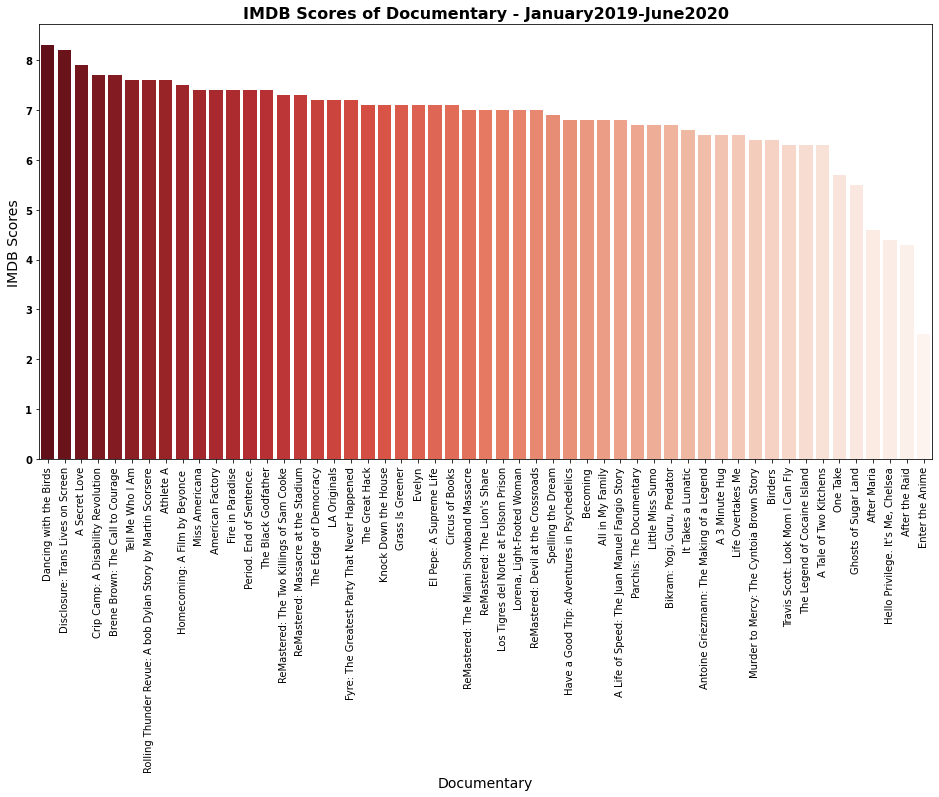

In [6]:
#2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini
movies["Premiere_Date"] = pd.to_datetime(movies.Premiere).sort_index()
doc_filter =movies.loc[(movies["Genre"] == "Documentary") & (movies["Premiere_Date"] > "2019-01-01") & (movies["Premiere_Date"] < "2020-06-30")].sort_values(by="IMDB Score", ascending=False)
print(doc_filter)
#Visualization
plt.figure(figsize=(16,8))
sns.barplot(x = "Title", y = "IMDB Score", data=doc_filter, palette="Reds_r")
plt.title("IMDB Scores of Documentary - January2019-June2020", weight="bold", color="black", fontsize=16)
plt.xlabel("Documentary", color="black", fontsize=14)
plt.ylabel("IMDB Scores", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.show()

In [7]:
#En yüksek imdb puanına sahip film
movies.loc[(movies["Language"] == "English")]
movies_highest_english = movies.loc[(movies["Language"] == "English")]
movies_highest_english.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


In [8]:
#Hint filmlerinin süresi
a = movies[movies['Language'].str.contains('Hindi')]['Runtime'].mean()
print("Runtime of the Hindi movies", a)


Runtime of the Hindi movies 111.02857142857142


In [9]:
#Genre sütunu kaç kategoriye sahiptir? Bunlar nelerdir?
a=len(movies.Genre.unique())
print("Total number of categories in the Genre column:", a)
b=movies["Genre"].value_counts()
print(b.head(20))

Total number of categories in the Genre column: 115
Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Name: Genre, dtype: int64


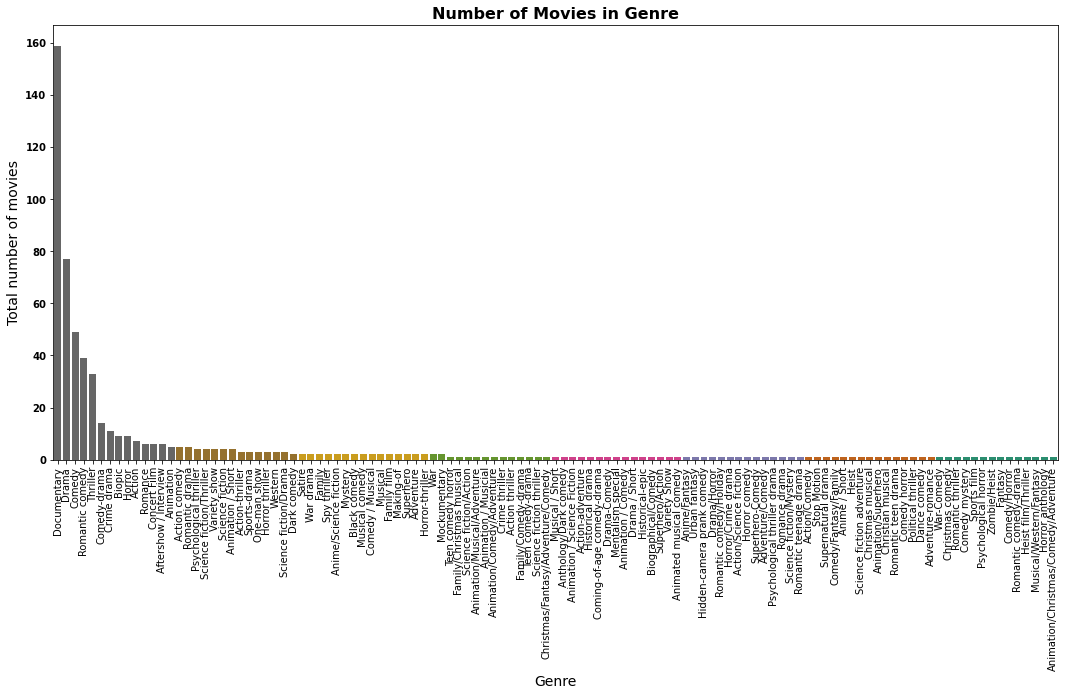

In [10]:
#Genre kategorisinin görselleştirilmesi
plt.figure(figsize=(18,8))
sns.countplot(x="Genre", data=movies, order = b.index, palette="Dark2_r")
plt.title("Number of Movies in Genre", weight="bold", color="black", fontsize=16)
plt.xlabel("Genre", color="black", fontsize=14)
plt.ylabel("Total number of movies", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.show()

In [11]:
#Filmlerde en çok kullanılan 3 dil
xx = movies["Language"].value_counts(sort=True)[0:3]
xx

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [12]:
#en yüksek IMDB skoruna sahip 10 film
imdb_top10 = movies.loc[:, ["IMDB Score", "Title"]].iloc[movies["IMDB Score"].sort_values(ascending=False)[:10].index]
imdb_top10

,IMDB Score,Title
583,9.0,David Attenborough: A Life on Our Planet
582,8.6,Emicida: AmarElo - It's All For Yesterday
581,8.5,Springsteen on Broadway
580,8.4,Winter on Fire: Ukraine's Fight for Freedom
579,8.4,Taylor Swift: Reputation Stadium Tour
578,8.4,Ben Platt: Live from Radio City Music Hall
577,8.3,Dancing with the Birds
576,8.3,Cuba and the Cameraman
573,8.2,Klaus
571,8.2,13th


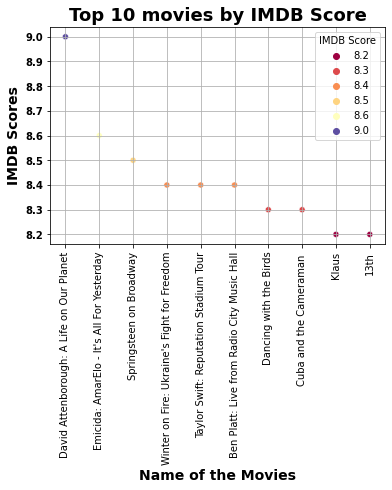

In [13]:
#Imdb skoru en iyi 10 film
sns.scatterplot(x="Title", y="IMDB Score", data=imdb_top10, palette='Spectral', hue='IMDB Score')
plt.title("Top 10 movies by IMDB Score", fontsize=18, weight="bold")
plt.xlabel("Name of the Movies", weight="bold", color="black", fontsize=14)
plt.ylabel("IMDB Scores", weight="bold", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.grid()
plt.show()

In [14]:
#en yüksek 'Runtime'a sahip 10 film
runtime_top10 = movies.loc[:, ["Runtime", "Title"]].iloc[movies["Runtime"].sort_values(ascending=False)[:10].index]
runtime_top10

,Runtime,Title
561,209,The Irishman
328,155,Da 5 Bloods
581,153,Springsteen on Broadway
247,151,Citation
284,151,The Forest of Love
509,149,Raat Akeli Hai
7,149,The Last Days of American Crime
543,149,Ludo
194,148,Army of the Dead
5,147,Drive


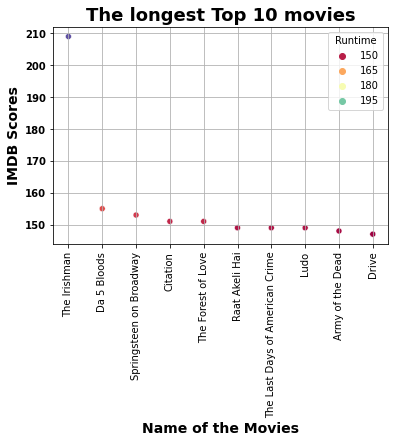

In [15]:
#en uzun 'Runtime'a sahip 10 filme ait grafik

sns.scatterplot(x="Title", y="Runtime", data=runtime_top10, palette='Spectral', hue='Runtime')
plt.title("The longest Top 10 movies", fontsize=18, weight="bold")
plt.xlabel("Name of the Movies", weight="bold", color="black", fontsize=14)
plt.ylabel("IMDB Scores", weight="bold", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.grid()
plt.show()

In [16]:
#korelasyon
corr = movies.corr()
corr.style.background_gradient(cmap='coolwarm')

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


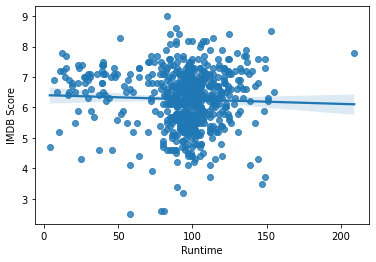

In [17]:
sns.regplot(x=movies["Runtime"], y=movies["IMDB Score"])
plt.savefig("Correlation_Scatterplot_Fit.jpg")

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64


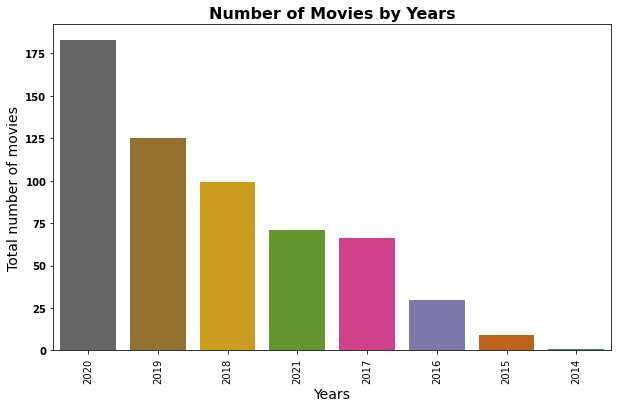

In [18]:
#Yayınlanma yıllarına göre film sayıları
movies["Premiere_Date"] = pd.to_datetime(movies.Premiere).sort_index()
movies['Year'] = pd.DatetimeIndex(movies.Premiere).year.astype(int)
year_of_movies = movies['Year'].value_counts()
print(year_of_movies)
plt.figure(figsize=(10,6))
sns.countplot(x="Year", data=movies, order = year_of_movies.index, palette="Dark2_r")
plt.title("Number of Movies by Years", weight="bold", color="black", fontsize=16)
plt.xlabel("Years", color="black", fontsize=14)
plt.ylabel("Total number of movies", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=10, weight="bold")
plt.show()

English             24
Hindi                6
French               5
Italian              4
Spanish              3
Korean               2
English/Japanese     1
Turkish              1
Indonesian           1
Malay                1
Dutch                1
English/Spanish      1
Portuguese           1
Filipino             1
German               1
Polish               1
Name: Language, dtype: int64


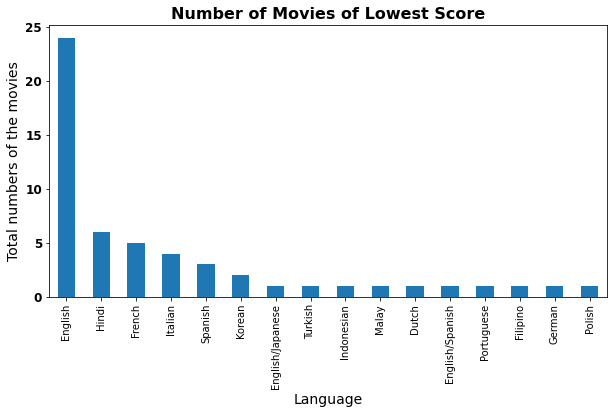

In [19]:
#Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? 
lowest_scores = movies.loc[:,["Language", "IMDB Score"]][movies["IMDB Score"] < 5.0]
count_of_lowest = lowest_scores.Language.value_counts()
print(count_of_lowest)
plt.figure(figsize=(10,5))
count_of_lowest.plot(kind="bar")
plt.title("Number of Movies of Lowest Score", weight="bold", color="black", fontsize=16)
plt.xlabel("Language", color="black", fontsize=14)
plt.ylabel("Total numbers of the movies", color="black", fontsize=14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(rotation = 0, fontsize=12, weight="bold")
plt.show()


In [20]:
#Yıllara göre toplam 'Runtime' süreleri
tot_runtime_years = movies[["Year", "Runtime"]].groupby("Year").sum().sort_values(["Runtime"], ascending=False)
print(tot_runtime_years)

      Runtime
Year         
2020    17384
2019    10856
2018     9405
2021     7214
2017     6129
2016     2766
2015      814
2014       81


In [23]:
year = movies.Year.value_counts()
RunYear = movies.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
RunYear

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129
2016,2766
2015,814
2014,81


In [22]:
#Her bir dilin en çok kullandığı 'Genre'
genre_by_language = movies.groupby(["Language"])["Genre"].value_counts().groupby('Language').sum(), ascending=False)
print(genre_by_language)

SyntaxError: ignored

In [26]:
#outliers data
movies.describe()[['IMDB Score', 'Runtime']]
movies.describe()

,Runtime,IMDB Score,Year
count,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644
std,27.761683,0.979256,1.473992
min,4.000000,2.500000,2014.000000
25%,86.000000,5.700000,2018.000000
50%,97.000000,6.350000,2019.000000
75%,108.000000,7.000000,2020.000000
max,209.000000,9.000000,2021.000000


In [31]:
fig1 = px.scatter(x=movies['IMDB Score'], y=movies['Runtime'])
fig1.show()
fig2 = px.box(movies, y='IMDB Score')
fig3 = px.box(movies, y='Runtime')
fig2.show()
fig3.show()